<a href="https://colab.research.google.com/github/WildanR19/bengkel_koding/blob/main/7_Transformasi_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rekayasa Fitur

In [ ]:
from spacy import displacy
import spacy
from matplotlib import pyplot as plt
import cv2
from sklearn.preprocessing import MinMaxScaler
import time
import random
import plotly.express as px
from sklearn.impute import KNNImputer
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential
from scipy.stats import pearsonr
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({'Country': ['Afghanistan', 'Cameroon', 'Indonesia', 'Guatemala'], 'UrbanPopulation': [10142913, 15248270, 153983073,
                  8738685], 'RuralPopulation': [28829316, 11242817, 117874900, 8119648], 'SlumPopulation': [7434756, 4981883, 29889391, 3285745]})
df.head()

,Country,UrbanPopulation,RuralPopulation,SlumPopulation
0,Afghanistan,10142913,28829316,7434756
1,Cameroon,15248270,11242817,4981883
2,Indonesia,153983073,117874900,29889391
3,Guatemala,8738685,8119648,3285745


In [ ]:
df['SlumPopulation'] = round(
    (df['SlumPopulation']/(df['UrbanPopulation']))*100, 2)
df.head()

,Country,UrbanPopulation,RuralPopulation,SlumPopulation
0,Afghanistan,10142913,28829316,73.30
1,Cameroon,15248270,11242817,32.67
2,Indonesia,153983073,117874900,19.41
3,Guatemala,8738685,8119648,37.60


In [ ]:
df['UrbanPopulation'] = round(
    (df['UrbanPopulation']/(df['UrbanPopulation']+df['RuralPopulation']))*100, 2)
df.head()

,Country,UrbanPopulation,RuralPopulation,SlumPopulation
0,Afghanistan,26.03,28829316,73.30
1,Cameroon,57.56,11242817,32.67
2,Indonesia,56.64,117874900,19.41
3,Guatemala,51.84,8119648,37.60


In [ ]:
df = df.drop(columns=['RuralPopulation'])
df.head()

,Country,UrbanPopulation,SlumPopulation
0,Afghanistan,26.03,73.30
1,Cameroon,57.56,32.67
2,Indonesia,56.64,19.41
3,Guatemala,51.84,37.60


Mean

In [ ]:
# buat dataset dengan format dataframe
df = pd.DataFrame({'age': [25, 26, 29, 30, 30, 31, 44, 46],
                   'IQ': [np.NaN, 121, 91, np.NaN, 110, np.NaN, 118, 93]})
display(df)

,age,IQ
0,25,NaN
1,26,121.0
2,29,91.0
3,30,NaN
4,30,110.0
5,31,NaN
6,44,118.0
7,46,93.0


In [ ]:
mean = df['IQ'].mean()
print(f'Mean: {mean}, dibulatkan menjadi {round(mean)}')
display(df)

Mean: 106.6, dibulatkan menjadi 107


,age,IQ
0,25,NaN
1,26,121.0
2,29,91.0
3,30,NaN
4,30,110.0
5,31,NaN
6,44,118.0
7,46,93.0


In [ ]:
# masukkan nilai mean ke missing value
df['IQ'] = df['IQ'].fillna(round(mean))
display(df)

,age,IQ
0,25,107.0
1,26,121.0
2,29,91.0
3,30,107.0
4,30,110.0
5,31,107.0
6,44,118.0
7,46,93.0


Arbiter

In [ ]:
# buat dataset dengan format dataframe
df = pd.DataFrame({'age': [25, 26, 29, 30, 30, 31, 44, 46],
                   'IQ': [np.NaN, 121, 91, np.NaN, 110, np.NaN, 118, 93]})
display(df)

,age,IQ
0,25,NaN
1,26,121.0
2,29,91.0
3,30,NaN
4,30,110.0
5,31,NaN
6,44,118.0
7,46,93.0


In [ ]:
df['IQ'] = df['IQ'].fillna(130)
display(df)

,age,IQ
0,25,130.0
1,26,121.0
2,29,91.0
3,30,130.0
4,30,110.0
5,31,130.0
6,44,118.0
7,46,93.0


Distribusi Normal

In [ ]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
data = [85, 90, 95, 95, 100, np.nan, 100, 110, 105, 105, 110,
        np.nan, 110, 110, 115, 115, 115, 120, np.nan, 125, 130]

# make a dataframe
df = pd.DataFrame({'age': age, 'IQ': data})
display(df)

,age,IQ
0,25,85.0
1,26,90.0
2,29,95.0
3,30,95.0
4,30,100.0
5,31,NaN
6,44,100.0
7,46,110.0
8,22,105.0
9,33,105.0


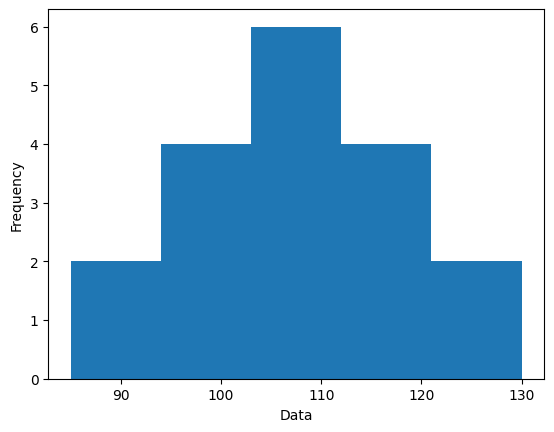

In [ ]:
data = [85, 90, 95, 95, 100, np.nan, 100, 110, 105, 105, 110,
        np.nan, 110, 110, 115, 115, 115, 120, np.nan, 125, 130]

plt.hist(data, bins=5)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# nilai kosong dihilangkan dari data terlebih dahulu
data = [85, 90, 95, 95, 100, 100, 110, 105, 105,
        110, 110, 110, 115, 115, 115, 120, 125, 130]
mean = np.mean(data)
print(f'Mean dari dataset adalah: ', mean)

Mean dari dataset adalah:  107.5


In [ ]:
total = 0
for i in data:
    calc = (107.5-i)**2
    total = total + calc

print(f'jarak antara nilai x dan mean adalah ', total)

jarak antara nilai x dan mean adalah  2412.5


In [ ]:
# math.sqrt adalah fungsi untuk melakukan operasi akar pangkat
# round adalah fungsi untuk membulatkan hasil operasi)
stddev = round(math.sqrt(total/len(data)), 2)
print(f'nilai standar deviasi adalah ', stddev)

nilai standar deviasi adalah  11.58


In [ ]:
imp = round(mean + 3 * stddev, 1)
print(f'nilai imputasi end of tail adalah ', imp)

nilai imputasi end of tail adalah  142.2


In [ ]:
df['IQ'] = df['IQ'].fillna(imp)
display(df)

,age,IQ
0,25,85.0
1,26,90.0
2,29,95.0
3,30,95.0
4,30,100.0
5,31,142.2
6,44,100.0
7,46,110.0
8,22,105.0
9,33,105.0


In [ ]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
data = [125, 130, 125, 95, 115, np.nan, 100, np.nan, 130, 110,
        90, 110, 120, 115, 105, 85, 115, 110, 120, 100, np.nan]

df = pd.DataFrame({'age': age, 'IQ': data})
display(df)

,age,IQ
0,25,125.0
1,26,130.0
2,29,125.0
3,30,95.0
4,30,115.0
5,31,NaN
6,44,100.0
7,46,NaN
8,22,130.0
9,33,110.0


In [ ]:
data = [125, 130, 125, 95, 115, 100, 130, 110, 90,
        110, 120, 115, 105, 85, 115, 110, 120, 100]

fig = px.histogram(df, x='IQ')
fig.show()

In [ ]:
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

print(f'Median: {median}')
print(f'Q1: {q1}')
print(f'Q3: {q3}')

Median: 112.5
Q1: 101.25
Q3: 120.0


In [ ]:
iqr = q3 - q1
iqrmin = q1 + 3 * iqr
iqrmax = q3 + 3 * iqr

print(f'IQR: {iqr}')
print(f'IQRmin: {iqrmin}')
print(f'IQRmax: {iqrmax}')

IQR: 18.75
IQRmin: 157.5
IQRmax: 176.25


In [ ]:
df['IQ'] = df['IQ'].fillna(iqrmax)
display(df)

,age,IQ
0,25,125.00
1,26,130.00
2,29,125.00
3,30,95.00
4,30,115.00
5,31,176.25
6,44,100.00
7,46,176.25
8,22,130.00
9,33,110.00


Regresi Linear

In [ ]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
data = [125, 130, 125, 95, 115, np.nan, 100, np.nan, 130, 110,
        90, 110, 120, 115, 105, 85, 115, 110, 120, 100, np.nan]

df = pd.DataFrame({'age': age, 'IQ': data})

# hapus data NaN
df = df.dropna()

# buat grafik scatter
fig = px.scatter(df, x='age', y='IQ',
                 color='age', hover_data=['age', 'IQ'])
fig.show()

In [ ]:
corr, _ = pearsonr(df['age'], df['IQ'])
print(f'Pearsons correlation: {round(corr,2)}')

Pearsons correlation: -0.53


1/1 [==============================] - 0s 40ms/step


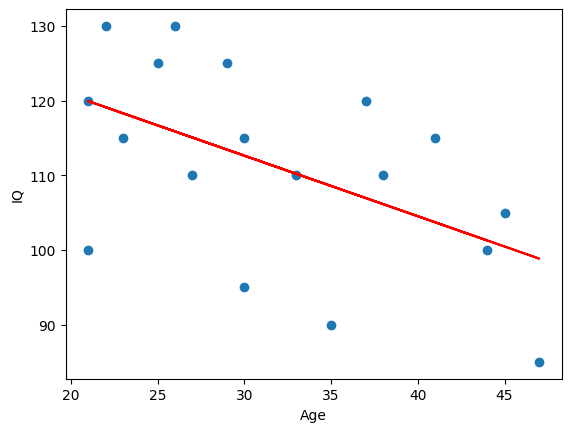

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

model.fit(df['age'], df['IQ'], epochs=1000, verbose=0)

pred = model.predict(df['age'])

plt.scatter(df['age'], df['IQ'])
plt.plot(df['age'], pred, color='red')
plt.xlabel('Age')
plt.ylabel('IQ')
plt.show()

In [ ]:
age2 = pd.DataFrame({'age': [27, 31, 37]})
hasilprediksi = model.predict(age2)
print(hasilprediksi)

1/1 [==============================] - 0s 24ms/step
[[115.05552]
 [111.81127]
 [106.94491]]


In [ ]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
data = [125, 130, 125, 95, 115, np.nan, 100, np.nan, 130, 110,
        90, 110, 120, 115, 105, 85, 115, 110, 120, 100, np.nan]

data[5] = hasilprediksi[0][0]
data[7] = hasilprediksi[1][0]
data[20] = hasilprediksi[2][0]
df = pd.DataFrame({'age': age, 'IQ': data})
display(df)

,age,IQ
0,25,125.000000
1,26,130.000000
2,29,125.000000
3,30,95.000000
4,30,115.000000
5,31,115.055519
6,44,100.000000
7,46,111.811272
8,22,130.000000
9,33,110.000000


Frequent

In [ ]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
IQ = ['rendah', 'sedang', 'sedang', np.nan, 'sedang', 'rendah', np.nan, 'tinggi', 'sedang', 'sedang',
      'rendah', 'sedang', 'tinggi', 'sedang', np.nan, 'rendah', 'tinggi', 'sedang', 'tinggi', 'rendah', 'tinggi']

df = pd.DataFrame({'age': age, 'IQ': IQ})
display(df)

,age,IQ
0,25,rendah
1,26,sedang
2,29,sedang
3,30,NaN
4,30,sedang
5,31,rendah
6,44,NaN
7,46,tinggi
8,22,sedang
9,33,sedang


In [ ]:
freq = df['IQ'].value_counts()
print(freq)

sedang    8
rendah    5
tinggi    5
Name: IQ, dtype: int64


In [ ]:
df['IQ'] = df['IQ'].fillna('sedang')
display(df)

,age,IQ
0,25,rendah
1,26,sedang
2,29,sedang
3,30,sedang
4,30,sedang
5,31,rendah
6,44,sedang
7,46,tinggi
8,22,sedang
9,33,sedang


In [ ]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
IQ = ['rendah', 'sedang', 'sedang', np.nan, 'sedang', 'rendah', np.nan, 'tinggi', 'sedang', 'sedang',
      'rendah', 'sedang', 'tinggi', 'sedang', np.nan, 'rendah', 'tinggi', 'sedang', 'tinggi', 'rendah', 'tinggi']

df = pd.DataFrame({'age': age, 'IQ': IQ})
display(df)

,age,IQ
0,25,rendah
1,26,sedang
2,29,sedang
3,30,NaN
4,30,sedang
5,31,rendah
6,44,NaN
7,46,tinggi
8,22,sedang
9,33,sedang


In [ ]:
df['IQ'] = df['IQ'].map({'rendah': 1, 'sedang': 2, 'tinggi': 3})
display(df)

,age,IQ
0,25,1.0
1,26,2.0
2,29,2.0
3,30,NaN
4,30,2.0
5,31,1.0
6,44,NaN
7,46,3.0
8,22,2.0
9,33,2.0


In [ ]:
imputer = KNNImputer(n_neighbors=3)
# isi missing value dengan KNN, lalu dibulatkan
df = pd.DataFrame(np.round(imputer.fit_transform(df)), columns=df.columns)
display(df)

,age,IQ
0,25.0,1.0
1,26.0,2.0
2,29.0,2.0
3,30.0,2.0
4,30.0,2.0
5,31.0,1.0
6,44.0,2.0
7,46.0,3.0
8,22.0,2.0
9,33.0,2.0


# Dokumentasi fitur

Tipe Data

In [ ]:
df = pd.read_csv('data_sampled_100.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           100 non-null    float64
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   artists           100 non-null    object 
 4   danceability      100 non-null    float64
 5   duration_ms       100 non-null    int64  
 6   energy            100 non-null    float64
 7   explicit          100 non-null    int64  
 8   id                100 non-null    object 
 9   instrumentalness  100 non-null    float64
 10  key               100 non-null    int64  
 11  liveness          100 non-null    float64
 12  loudness          100 non-null    float64
 13  mode              100 non-null    int64  
 14  name              100 non-null    object 
 15  popularity        100 non-null    int64  
 16  release_date      100 non-null    object 
 17

Skala Data

In [ ]:
df = pd.read_csv('./data_sampled_100.csv')
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.506688,1979.040000,0.522918,0.537518,2.762373e+05,0.461174,0.120000,0.164812,4.940000,0.180223,-11.769480,0.730000,34.540000,0.110832,119.779170
std,0.284391,25.147613,0.354783,0.185604,3.724344e+05,0.253916,0.326599,0.302744,3.716792,0.155208,5.685826,0.446196,21.180046,0.194693,31.438102
min,0.029800,1926.000000,0.000175,0.091800,6.240000e+04,0.005740,0.000000,0.000000,0.000000,0.040300,-31.808000,0.000000,0.000000,0.024500,62.106000
25%,0.291500,1960.750000,0.207750,0.399500,1.671165e+05,0.254000,0.000000,0.000000,1.000000,0.093325,-15.430750,0.000000,19.000000,0.033700,94.762500
50%,0.521000,1981.500000,0.596000,0.551000,2.015920e+05,0.465000,0.000000,0.000137,5.000000,0.124500,-11.280000,1.000000,36.500000,0.042450,115.329000
75%,0.758250,1999.500000,0.821000,0.681000,2.804202e+05,0.631500,0.000000,0.141500,8.000000,0.199750,-7.177250,1.000000,48.250000,0.066475,137.057250
max,0.977000,2019.000000,0.993000,0.880000,3.650800e+06,0.994000,1.000000,0.921000,11.000000,0.967000,-2.478000,1.000000,73.000000,0.957000,205.917000


# Pengolahan Citra

In [ ]:
import cv2
import matplotlib.pyplot as plt

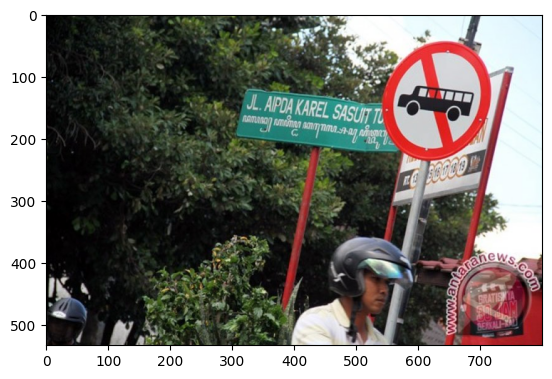

In [ ]:
# buka gambar menggunakan opencv
img = cv2.imread("lalin2.jpg")

# OpenCV membuka gambar menggunakan metode BRG (blue red green)
# namun kita ingin membuka dengan metoded RGB (red green blue)
# kita harus konversi dari BRG ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# kita juga membutuhkan gambar versi grayscale (hitam putih)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# menampilkan gambar menggunakan matplotlib
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

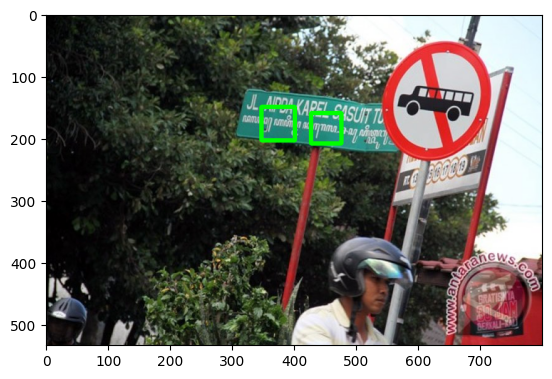

In [ ]:
# load model yang sudah dilatih untuk mendeteksi stop sign
# model berbentuk file xml
stop_data = cv2.CascadeClassifier('stop_data.xml')

# buat ukuran kotak minimum agar ukuran kotak yang terdeteksi tidak terlalu kecil
found = stop_data.detectMultiScale(img_gray,
                                   minSize=(5, 5))

# hitung jumlah objek yang ditemukan.
amount_found = len(found)

# jika objek tidak ditemukan maka tidak dilakukan apa-apa
if amount_found != 0:

    # jika objek yang ditemukan lebih dari satu, maka :
    for (x, y, width, height) in found:

        # kita gambar sebuah kotak hijau di objek yang ditemukan
        cv2.rectangle(img_rgb, (x, y),
                      (x + height, y + width),
                      (0, 255, 0), 5)

# tampilkan hasil citra menggunakan plt
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

# Data Labeling

In [ ]:
import spacy
from spacy import displacy

In [ ]:
NER = spacy.load("en_core_web_sm")

In [ ]:
rawtext = "Asus Zenfone 10 will please everyone who finds the current flagship cellphones too bulky: the compact and relatively light smartphone comes with a lot of memory on request, which also works as fast as an arrow. It scores with very high system performance, long software updates, fast WiFi 7 and a stylish, IP-certified case that is also available in brighter color variants. At a price of US$749, however, the smartphone competes with the Samsung Galaxy S23 or the Apple iPhone 13 mini and you have to accept a few weaknesses. For example, compared to Samsung's flagship, the camera lacks the optical zoom capability, which reduces the flexibility of the camera setup. Compared to the iPhone, the images appear less sharp. The screen could also be a little brighter, the strong heating of the phone under high load is annoying and the battery life is average. The fact that Asus installs a USB 2.0 port in its Zenfone 10 is also no reason for joy. But users who want a 3.5mm port combined with high performance will hardly get past the Zenfone 10."

In [ ]:
text1 = NER(rawtext)

for word in text1.ents:
    print(word.text, '-', word.label_)

Asus Zenfone - PERSON
WiFi - PERSON
7 - CARDINAL
IP - ORG
749 - MONEY
Samsung - ORG
Apple - ORG
13 - CARDINAL
Samsung - ORG
iPhone - ORG
Asus - PERSON
2.0 - CARDINAL
Zenfone 10 - LAW
3.5mm - QUANTITY


# Cronbach Alpha Test

In [ ]:
!pip install numpy
!pip install scipy

In [ ]:
data = np.array([[4,3,5,2,4], [5,4,4,3,5], [3,2,3,4,3], [4,4,5,5,4]])
print(data)

[[4 3 5 2 4]
 [5 4 4 3 5]
 [3 2 3 4 3]
 [4 4 5 5 4]]


In [ ]:
# hitung rata2
item_means = np.mean(data,axis=0)
print(item_means)

[4.   3.25 4.25 3.5  4.  ]


In [ ]:
# Hitung Variansi dari Total Skor dan Skor Setiap Item
total_var = np.var(np.sum(data, axis=1))
item_var = np.var(data, axis=0, ddof=1)
print(f'total variance : ',total_var)
print(f'item variance : ',item_var)

total variance :  7.5
item variance :  [0.66666667 0.91666667 0.91666667 1.66666667 0.66666667]


In [ ]:
# Hitung Rata-Rata dari Setiap Item/Fitur
num_items = len(item_means)
cronbach_alpha = (num_items / (num_items - 1)) * (1-(np.sum(item_var) / total_var))
print(f'Nilai Cronbach Alpha adalah : ', cronbach_alpha)

Nilai Cronbach Alpha adalah :  0.4444444444444444
